# Minst 手写数字识别

## 使用Keras进行多层神经网络建模

In [221]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

print(tf.__version__)

2.7.0


## 载入数据

In [222]:
# 获取 Mints手写数字数据集
mnist = keras.datasets.mnist

# 训练数据，测试数据
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 特征数据归一化

In [223]:
# 对图像images进行数字标准化
train_images = train_images / 255.0
test_images = test_images / 255.0

## 独热编码（本例中将使用Keras中的sparse_categorical_crossentropy，可无需先进行独热编码）

In [224]:
# 对标签数据进行 one-hot-Encoding 独热编码
# train_label_ohe = tf.one_hot(train_labels, depth=10).numpy()
# test_label_ohe = tf.one_hot(test_labels, depth=10).numpy()

## 建立模型

In [225]:
# 建立 Sequential 线性堆叠模型
model = tf.keras.models.Sequential()

## 添加输入层（平坦层，Flatten）

In [226]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

## 添加隐藏层（密集层，Dense）

In [227]:
# 添加全连接层1
model.add(tf.keras.layers.Dense(units=64,  # 神经元个数
                                # input_dim = 784,# 该参数可不填，系统会自动对从输入层过来的数据进行降维
                                kernel_initializer="normal",
                                activation="relu"))

In [228]:
# 添加全连接层2
model.add(tf.keras.layers.Dense(units=32,
                                # input_dim = 256,# 该参数可不填，系统会自动对从输入层过来的数据进行降维
                                kernel_initializer="normal",
                                activation="relu"))

## 添加输出层（还是密集层）

In [229]:
# 添加输出层
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## 输出模型摘要

In [230]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 64)                50240     
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## 以上建模也可一次性建成

In [231]:
# 等效于上面逐层添加
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=64, kernel_initializer="normal", activation="relu"),
    tf.keras.layers.Dense(units=32, kernel_initializer="normal", activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

## 定义模型训练模式

In [232]:
model.compile(
    optimizer="Adam",  # 优化器
    # loss="categorical_crossentropy",  # 损失函数
    loss="sparse_categorical_crossentropy",  # 损失函数（整合独热编码API）
    metrics=["accuracy"]
)

## 模型训练

In [233]:
# 设置训练参数
train_epochs = 10
batch_size = 30

In [234]:
# 模型训练
train_history = model.fit(
    x=train_images,  # 训练数据
    # y=train_label_ohe,  # 目标数据（标签数据）
    y=train_labels,  # 目标数据（标签数据）
    epochs=train_epochs,  # 训练迭代次数
    batch_size=batch_size,  # 批次大小
    validation_split=0.2,  # 验证集占比
    verbose=1,  # 训练过程的日志显示，
    # verbose=2
    # 0：不在标准输出流输出日志信息
    # 1：输出进度条显示
    # 2：每个epoch输出一行记录
)

Epoch 1/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3482 - accuracy: 0.8982 - val_loss: 0.1739 - val_accuracy: 0.9495
Epoch 2/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.1509 - accuracy: 0.9553 - val_loss: 0.1423 - val_accuracy: 0.9567
Epoch 3/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.1082 - accuracy: 0.9667 - val_loss: 0.1166 - val_accuracy: 0.9647
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.0829 - accuracy: 0.9750 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 5/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.1006 - val_accuracy: 0.9702
Epoch 6/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.1044 - val_accuracy: 0.9709
Epoch 7/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.1060 - val_accuracy:

## 模型历史

In [235]:
# history是一个字典型数据
# 包含了【loss：训练集损失率、accuracy：训练集准确率、val_loss：验证集损失率、val_accuracy验证集准确率】
train_history.history

{'loss': [0.3482276201248169,
  0.1508565992116928,
  0.10820555686950684,
  0.0828528106212616,
  0.06734287738800049,
  0.054677560925483704,
  0.04615674167871475,
  0.039299145340919495,
  0.03314066678285599,
  0.0289368387311697],
 'accuracy': [0.8982083201408386,
  0.9553333520889282,
  0.9666666388511658,
  0.9750000238418579,
  0.9793750047683716,
  0.9825624823570251,
  0.9853125214576721,
  0.9871875047683716,
  0.9896458387374878,
  0.9909166693687439],
 'val_loss': [0.17391924560070038,
  0.1422809511423111,
  0.11657361686229706,
  0.10670682042837143,
  0.10061926394701004,
  0.10440091788768768,
  0.10595012456178665,
  0.10730248689651489,
  0.10157106816768646,
  0.11709706485271454],
 'val_accuracy': [0.9495000243186951,
  0.9567499756813049,
  0.9647499918937683,
  0.9677500128746033,
  0.9701666831970215,
  0.9709166884422302,
  0.9714999794960022,
  0.9695000052452087,
  0.9749166369438171,
  0.9698333144187927]}

## 训练过程可视化

In [236]:
def show_train_history(train_history, train_metric, val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])

    plt.title("Train History")
    plt.xlabel("Epochs")
    plt.ylabel(train_metric)

    plt.legend(["Train", "Validation"], loc="upper left")

    plt.show()

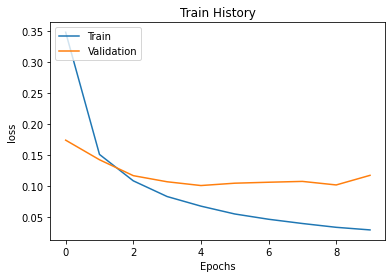

In [237]:
show_train_history(train_history,"loss","val_loss")

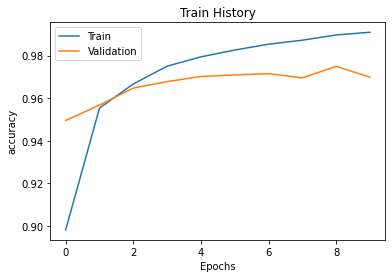

In [238]:
show_train_history(train_history,"accuracy","val_accuracy")

## 评估模型

In [239]:
yy = model.evaluate(test_images, test_labels,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.1094 - accuracy: 0.9731


In [240]:
yy

[0.10941366851329803, 0.9731000065803528]

In [241]:
model.metrics_names

['loss', 'accuracy']

## 应用模型

In [242]:
test_pred = model.predict(test_images)

In [243]:
test_pred.shape

(10000, 10)

In [244]:
np.argmax(test_pred[0])

7

## 使用Keras的API进行模型预测

但在TensorFlow 2.6版本中删除了这个predict_classes函数

In [245]:
# test_pred = model.predict_classes(test_images)

In [246]:
# test_pred[0]

In [247]:
# test_labels[0]